Author: Parin Acharya


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('FinancialMarketData.csv')

In [3]:
df.head()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,22.50,6.671,6.657,6.428,5.426,5.781,6.121,5.541,4.316,2.89,6.321,5.777,4.495,2.422,1.709,0.346,4.535,4.770,6.524,870.94,474.045,990.75,546.04,305.057,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,21.50,6.747,6.748,6.465,5.378,5.803,6.254,5.644,4.321,3.03,6.459,5.889,4.535,2.418,1.765,0.349,4.746,4.975,6.613,869.33,473.223,990.48,545.68,305.303,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,23.02,6.634,6.692,6.432,5.562,5.819,6.045,5.515,4.270,3.15,6.281,5.760,4.511,2.259,1.625,0.293,4.691,4.900,6.521,873.50,472.723,997.68,546.70,306.181,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,23.45,6.423,6.619,6.574,5.708,5.885,5.944,5.459,4.326,3.30,6.188,5.710,4.540,2.330,1.770,0.364,4.593,4.794,6.467,871.22,473.255,997.91,547.38,305.997,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,21.25,6.231,6.613,6.678,5.677,5.891,5.850,5.482,4.390,3.26,6.118,5.728,4.638,2.481,1.919,0.359,4.548,4.768,6.472,872.39,474.733,998.77,548.25,309.476,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [4]:
df[df['Y'] == 0].describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,874.0,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,0.0,990.433593,0.052664,2347.495423,247.881169,90.323585,107.616281,1.579962,61.653707,17.300263,3.896549,3.270061,2.021456,1.599518,1.820856,2.908183,2.313506,1.303573,1.202072,4.230992,3.453836,1.835333,1.681562,0.859324,0.132787,3.384553,3.374560,2.260985,1660.073970,901.667633,2132.510297,1285.861659,842.730654,244.111644,731.721141,265.240222,1677.502025,110.625195,813.943009,1925.515492,671.854016,733.038192,55.859222
std,0.0,472.840491,0.335677,2014.431535,66.348132,10.483254,11.547186,0.221348,24.492175,5.194502,1.141619,1.283589,1.680322,1.772110,1.874724,1.762839,1.839964,1.841740,1.649018,1.196397,1.383427,1.616141,0.746508,0.666521,0.301040,1.272939,1.370482,2.125250,412.535699,239.827768,682.030867,551.115020,368.706351,109.666432,306.805151,73.623324,699.762950,19.452209,190.909211,954.034630,286.306596,409.243710,24.792759
min,0.0,257.100000,-0.873000,291.000000,129.574000,71.329000,76.720000,1.206000,18.080000,9.430000,1.185700,0.508000,0.107300,-0.010000,0.105750,-0.204000,-0.708000,-0.919000,-0.498000,1.386000,0.512000,-0.458000,0.056000,-0.291000,-0.351000,0.598100,0.489200,-0.163300,869.330000,472.723000,990.460000,495.320000,301.362000,81.986000,230.527000,121.331000,787.160000,63.760000,443.820000,326.720000,161.560000,125.810000,13.720000
25%,0.0,448.992500,-0.173750,1019.000000,186.208000,81.486750,102.810000,1.401500,44.560000,13.120000,2.959500,2.251750,0.613000,0.093000,0.231250,1.176250,0.433000,-0.543250,-0.337250,3.259250,2.133250,0.185750,0.853500,0.085500,-0.123750,2.018000,1.946500,0.461500,1260.815000,690.375750,1517.960000,783.765000,505.618750,143.396250,457.186750,206.406000,1130.237500,94.155000,660.890000,1148.162500,493.902500,318.342500,30.380000
50%,0.0,1177.875000,0.041000,1587.000000,250.235000,89.825000,109.025000,1.574500,58.350000,16.010000,4.108000,3.068500,1.583500,1.009500,1.218000,3.330500,2.655500,0.892000,0.346000,4.587500,3.943500,1.814500,1.908500,0.931500,0.092500,3.998000,4.017000,0.857000,1738.445000,882.947500,2089.980000,1248.845000,830.660500,229.733500,733.677500,275.520000,1391.480000,113.575000,814.240000,1876.695000,626.105000,730.030000,60.735000
75%,0.0,1314.617500,0.251250,2959.250000,301.856500,96.734750,115.855000,1.742750,78.157500,20.747500,4.815000,4.318750,2.955750,2.363250,2.501500,4.467500,3.995000,2.715500,2.347500,5.104750,4.446250,2.919000,2.328250,1.443250,0.200000,4.483250,4.588000,4.470500,2036.495000,1122.158000,2722.047500,1735.510000,1154.240500,348.385250,1003.778750,323.490000,2037.430000,127.905000,977.975000,2424.240000,803.947500,1052.482500,70.410000
max,0.0,2006.910000,0.991000,11793.000000,449.490000,119.820000,134.630000,2.068000,138.740000,32.880000,6.747000,6.748000,6.788000,6.414000,6.665000,6.254000,5.644000,5.264000,5.730000,6.693000,5.889000,5.462000,3.128000,1.968000,1.080000,5.060000,5.242000,6.613000,2325.860000,1350.500000,3550.430000,2378.530000,1525.790000,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [5]:
df[df['Y'] == 1].describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.00000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,1.0,976.511646,-0.024734,1936.683544,235.535947,93.189671,102.879072,1.531673,57.220928,29.919283,3.951921,3.254532,1.875776,1.485430,1.892491,3.522743,2.945692,1.901435,1.959633,5.14854,4.517747,3.099051,1.882819,1.069346,0.214321,3.692089,3.708382,2.442812,1553.284557,817.043392,1873.730042,1029.893165,664.548814,187.850703,603.550203,236.234658,1346.991603,97.742954,677.544473,1820.982785,563.226160,546.082785,46.830295
std,0.0,568.765356,0.390920,2001.477121,74.312577,13.999697,16.265108,0.170275,30.343985,11.210110,1.307586,1.501918,1.815720,1.913381,2.033678,1.760801,1.812559,1.929802,1.852790,1.29721,1.457602,1.637352,0.587340,0.521897,0.275397,1.198533,1.320146,2.138971,424.517906,236.443387,685.865129,513.489650,341.775557,99.179127,301.127765,80.027618,630.095194,22.433593,196.878357,1096.095815,328.954032,355.435302,23.242389
min,1.0,256.680000,-0.974000,345.000000,106.293000,72.369000,75.940000,1.172000,10.010000,13.710000,1.163000,0.571000,0.130900,-0.038000,0.140500,-0.471000,-0.794000,-0.968000,-0.472000,1.57300,0.699000,-0.379000,0.312000,-0.113000,-0.251000,0.547000,0.491000,-0.105800,872.390000,474.733000,986.940000,491.080000,294.367000,80.797000,237.812000,122.002000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,1.0,317.050000,-0.289000,971.000000,173.740000,80.899000,89.870000,1.442000,29.480000,21.910000,2.980000,2.006000,0.302000,0.087000,0.257000,2.359000,1.541000,0.091000,0.326000,4.91200,4.249000,2.037000,1.812000,0.822000,0.050000,3.093000,2.856000,0.511000,1122.050000,592.882000,1240.440000,555.430000,330.486000,106.475000,278.383000,144.784000,973.590000,80.820000,504.330000,768.910000,272.040000,177.450000,25.410000
50%,1.0,901.750000,-0.013000,1366.000000,215.880000,87.581000,107.340000,1.533000,45.940000,27.050000,4.091000,3.164000,1.029000,0.283000,0.985000,3.906000,3.153000,1.470000,1.273000,5.41500,4.846000,3.448000,1.995000,1.221000,0.127000,4.261000,4.316000,1.445000,1564.440000,768.478000,1662.020000,881.000000,586.794000,150.307000,554.560000,247.689000,1193.170000,92.830000,616.170000,1711.270000,533.560000,589.570000,52.290000
75%,1.0,1601.320000,0.285000,1795.000000,297.170000,106.800000,117.280000,1.585000,86.890000,35.080000,5.184000,4.501000,2.866000,2.207000,2.506000,5.106000,4.613000,3.877000,3.615000,5.97100,5.429000,4.296000,2.275000,1.413000,0.392000,4.490000,4.679000,4.583000,1860.340000,975.957000,2303.900000,1337.600000,879.031000,239.939000,810.849000,302.006000,1351.480000,117.180000,852.730000,2807.800000,767.290000,707.360000,59.980000
max,1.0,1975.060000,0.869000,11039.000000,467.570000,119.620000,133.940000,2.085000,140.970000,75.910000,6.246000,6.613000,6.872000,6.361000,6.776000,5.900000,5.562000,5.186000,5.160000,7.50000,7.209000,7.015000,2.812000,1.919000,0.986000,5.075000,5.237000,6.472000,2321.740000,1317.256000,3478.600000,2230.010000,1436.257000,418.688000,1252.322000,387.906500,3414.210000,144.000000,1082.580000,4430.990000,1562.150000,1395.800000,104.220000


In [6]:
# Correlation matrix
corr_df = df.select_dtypes(include = (np.number))
corr_df.corr()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
Y,1.000000,-0.011535,-0.090772,-0.083440,-0.074102,0.103227,-0.151197,-0.093201,-0.070141,0.598432,0.019255,-0.004776,-0.034909,-0.025935,0.015379,0.141537,0.139933,0.130607,0.180311,0.295000,0.297573,0.304528,0.114555,0.133660,0.112314,0.099777,0.100142,0.035010,-0.104897,-0.143607,-0.153544,-0.189661,-0.197232,-0.209774,-0.169475,-0.156550,-0.193928,-0.253877,-0.279399,-0.043429,-0.148848,-0.188942,-0.149581
XAU BGNL,-0.011535,1.000000,0.114798,-0.315007,0.015316,-0.428891,-0.576191,-0.422084,0.515215,-0.075873,-0.868696,-0.893317,-0.742875,-0.643295,-0.642887,-0.828390,-0.835680,-0.837306,-0.816037,-0.438149,-0.474818,-0.594534,-0.622158,-0.684303,-0.440619,-0.741511,-0.783369,-0.896144,0.922561,0.879618,0.881462,0.851359,0.861813,0.817990,0.891486,0.925465,0.625814,0.176177,0.036654,0.581667,0.339929,0.831756,0.829659
ECSURPUS,-0.090772,0.114798,1.000000,-0.102022,-0.139779,0.074835,-0.070422,-0.188233,-0.016245,-0.094127,-0.015927,-0.016744,-0.058576,-0.106247,-0.141989,-0.051631,-0.052426,-0.103871,-0.164457,-0.045534,-0.055275,-0.126404,-0.091052,-0.086513,-0.264406,-0.120088,-0.116439,-0.078089,0.071001,0.091600,0.129199,0.141863,0.131176,0.115747,0.110335,0.073268,0.192180,0.014535,0.034829,-0.014098,-0.077750,0.102198,0.115145
BDIY,-0.083440,-0.315007,-0.102022,1.000000,0.596182,-0.441793,0.062822,0.756718,0.286396,-0.045367,0.390852,0.391498,0.324485,0.316566,0.382483,0.435070,0.460335,0.511614,0.497767,0.216254,0.269495,0.418313,0.468681,0.529466,0.666506,0.452088,0.485795,0.523993,-0.363202,-0.365687,-0.375367,-0.377746,-0.365869,-0.410941,-0.350372,-0.241704,-0.300277,-0.058349,0.103124,0.337489,0.606526,-0.240799,-0.033084
CRY,-0.074102,0.015316,-0.139779,0.596182,1.000000,-0.798564,-0.412364,0.793954,0.785614,-0.190060,0.256228,0.178731,0.028815,0.043997,0.092995,0.321041,0.320875,0.277763,0.234478,0.411076,0.430051,0.401355,0.570971,0.524412,0.623228,0.478155,0.450480,0.197512,-0.190604,-0.260545,-0.274922,-0.282961,-0.248420,-0.315491,-0.218547,-0.045101,-0.458623,-0.261605,-0.235202,0.641511,0.761661,-0.210901,-0.031605
DXY,0.103227,-0.428891,0.074835,-0.441793,-0.798564,1.000000,0.650429,-0.544966,-0.816378,0.115712,0.187296,0.274784,0.387242,0.351606,0.307930,0.087873,0.102974,0.192595,0.245495,-0.100070,-0.086766,0.034774,-0.176492,-0.133376,-0.318889,-0.098475,-0.056631,0.264384,-0.261856,-0.174728,-0.157217,-0.120882,-0.158966,-0.074069,-0.201703,-0.386866,0.144988,0.300674,0.247446,-0.776353,-0.756141,-0.188670,-0.352379
JPY,-0.151197,-0.576191,-0.070422,0.062822,-0.412364,0.650429,1.000000,-0.008633,-0.608209,-0.134791,0.260793,0.384427,0.496548,0.455076,0.438144,0.143504,0.172881,0.321285,0.364440,-0.296316,-0.245225,-0.015348,-0.048206,0.003475,0.030774,0.025687,0.088961,0.459662,-0.302912,-0.198762,-0.200088,-0.159244,-0.180781,-0.113902,-0.225936,-0.330176,0.115772,0.392934,0.557078,-0.639573,-0.306819,-0.149469,-0.269353
GBP,-0.093201,-0.422084,-0.188233,0.756718,0.793954,-0.544966,-0.008633,1.000000,0.352787,-0.124496,0.547876,0.502849,0.338006,0.314838,0.358554,0.602251,0.613232,0.603435,0.553107,0.426671,0.472687,0.552392,0.731792,0.732133,0.763124,0.695556,0.696851,0.598820,-0.543632,-0.568331,-0.576845,-0.585356,-0.562720,-0.598572,-0.549016,-0.402361,-0.594595,-0.246342,-0.113736,0.224720,0.530964,-0.501925,-0.329350
Cl1,-0.070141,0.515215,-0.016245,0.286396,0.785614,-0.816378,-0.608209,0.352787,1.000000,-0.213999,-0.194274,-0.268299,-0.346334,-0.291911,-0.247244,-0.143429,-0.158079,-0.208169,-0.226246,0.171692,0.158882,0.021452,0.130170,0.041538,0.261732,0.019102,-0.027489,-0.324135,0.324734,0.243818,0.228943,0.233435,0.268926,0.196312,0.292426,0.438823,-0.029697,-0.062125,-0.160278,0.86

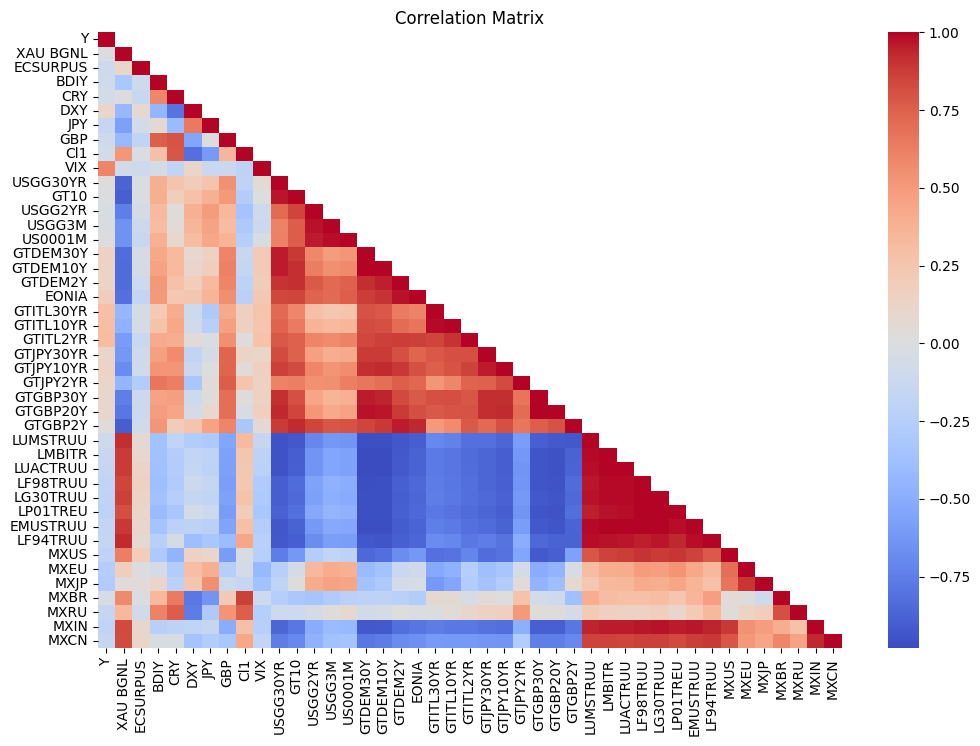

In [12]:
corr_matrix = corr_df.corr()

# Get the upper triangle to avoid duplicates
upper_triangle = np.triu(corr_matrix)

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix), k = 1)

plt.figure(figsize = (12,8))

sns.heatmap(corr_matrix, mask = mask, annot = False, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Return the top correlating variables with the Y column
correlations = corr_df.corr()['Y'].sort_values(ascending = False)
print(correlations)


Y            1.000000
VIX          0.598432
GTITL2YR     0.304528
GTITL10YR    0.297573
GTITL30YR    0.295000
EONIA        0.180311
GTDEM30Y     0.141537
GTDEM10Y     0.139933
GTJPY10YR    0.133660
GTDEM2Y      0.130607
GTJPY30YR    0.114555
GTJPY2YR     0.112314
DXY          0.103227
GTGBP20Y     0.100142
GTGBP30Y     0.099777
GTGBP2Y      0.035010
USGG30YR     0.019255
US0001M      0.015379
GT10        -0.004776
XAU BGNL    -0.011535
USGG3M      -0.025935
USGG2YR     -0.034909
MXBR        -0.043429
Cl1         -0.070141
CRY         -0.074102
BDIY        -0.083440
ECSURPUS    -0.090772
GBP         -0.093201
LUMSTRUU    -0.104897
LMBITR      -0.143607
MXRU        -0.148848
MXCN        -0.149581
JPY         -0.151197
LUACTRUU    -0.153544
LF94TRUU    -0.156550
EMUSTRUU    -0.169475
MXIN        -0.188942
LF98TRUU    -0.189661
MXUS        -0.193928
LG30TRUU    -0.197232
LP01TREU    -0.209774
MXEU        -0.253877
MXJP        -0.279399
Name: Y, dtype: float64


In [17]:
# Extension: include box plots for top 5 correlating and top 5 inversely correlating columnns.

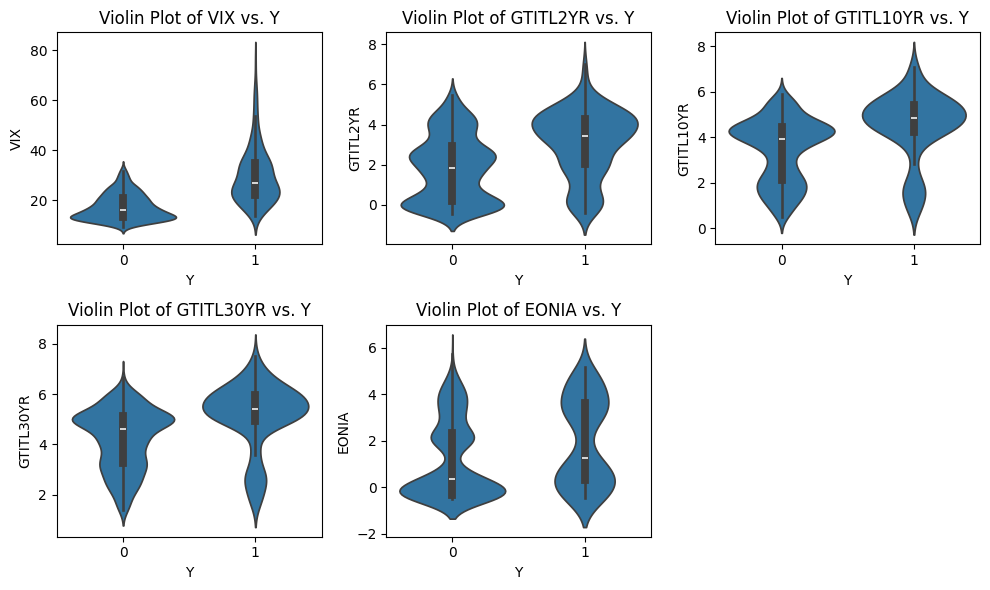

In [18]:
# Violin plot to show the distributions in the correlation matrix

# Top 5 correlating variables
top_5_corr = correlations[1:6] # Exclude 'Y' itself
top_5_corr_cols = top_5_corr.index.tolist()

plt.figure(figsize=(10, 6))
for i, col in enumerate(top_5_corr_cols):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(x='Y', y=col, data=df)
    plt.title(f'Violin Plot of {col} vs. Y')
plt.tight_layout()
plt.show()

In [35]:
# 33:02
from sklearn.linear_model import LogisticRegression
x = df[['VIX']]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression(random_state = 42, max_iter = 1000, C = 0.3, class_weight = 'balanced', solver = 'lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('classification report')
print(classification_report(y_test, y_pred))

classification report
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       177
           1       0.51      0.76      0.61        46

    accuracy                           0.80       223
   macro avg       0.72      0.79      0.74       223
weighted avg       0.84      0.80      0.82       223



In [43]:
# Isolation forest model
from sklearn.ensemble import IsolationForest

X = df[['VIX', 'DXY', 'GTITL30YR', 'GTITL2YR', 'GTJPY2YR']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Isolation Forest model
model_if = IsolationForest(n_estimators=200, max_samples=1000, contamination=0.10, random_state=42)
model_if.fit(X_train)

# Predict anomalies
y_pred_if = model_if.predict(X_test)

# Convert predictions to binary classification (1 for inliers, 0 for outliers)
y_pred_if = [1 if i == 1 else 0 for i in y_pred_if]

print('Isolation Forest Classification Report:')
print(classification_report(y_test, y_pred_if))

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_iforest.py:338: UserWarning: max_samples (1000) is greater than the total number of samples (888). max_samples will be set to n_samples for estimation.
  warn(


Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.05      0.08       177
           1       0.15      0.65      0.24        46

    accuracy                           0.17       223
   macro avg       0.24      0.35      0.16       223
weighted avg       0.30      0.17      0.11       223



Decision Tree Accuracy: 0.8475336322869955
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       177
           1       0.93      0.28      0.43        46

    accuracy                           0.85       223
   macro avg       0.89      0.64      0.67       223
weighted avg       0.86      0.85      0.81       223



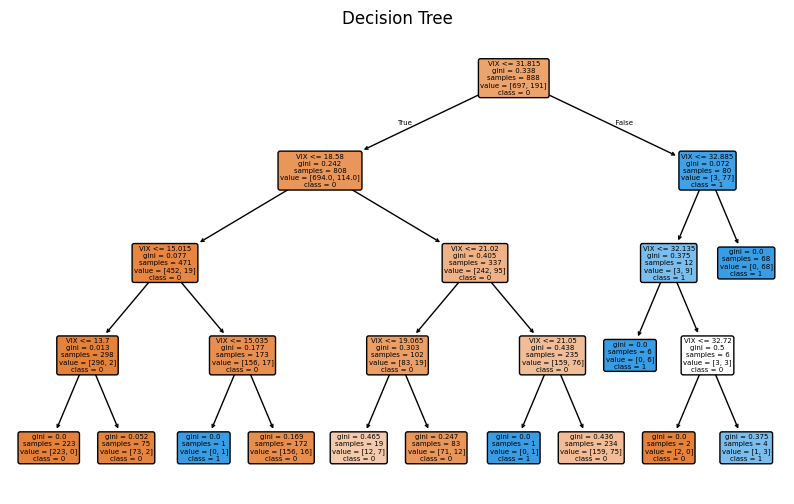

In [55]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

x = df[['VIX']]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
dt_model = DecisionTreeClassifier(max_depth = 4, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_dt))

plt.figure(figsize=(10, 6))

plot_tree(dt_model, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded = True, fontsize = 5)
plt.title('Decision Tree')
plt.show()

In [25]:
# Training base XGBoost on the same data
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

print('XGBoost Classification Report')
print(classification_report(y_test, xgb_pred))

XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       177
           1       0.68      0.41      0.51        46

    accuracy                           0.84       223
   macro avg       0.77      0.68      0.71       223
weighted avg       0.82      0.84      0.82       223



In [63]:
!pip install openai
import os
import pandas as pd
from openai import OpenAI


client = OpenAI(
    api_key = os.getenv('OPENAI_API_KEY')
)
predictions = y_pred

prompt = f"""
Based on the following model predictions for financial market anomalies from the dataset {df}, propose a data-driven investment strategy focusing on minimizing losses and maximizing returns.  The predictions (1 indicates an anomaly, 0 indicates no anomaly).  Consider the following in your analysis and recommendations:

* Previous prediction results: {predictions}; dataframe: {df}
* Historical market trends indicated by the provided dataset.
* The accuracy of the predictive model (shown in the preceding output).
* Risk tolerance (assume moderate risk tolerance).
* Potential diversification strategies.  Consider different asset classes (stocks, bonds, real estate, etc.) and how they might perform during predicted anomalies.
* Actions to take during predicted anomalies (buy, sell, hold).  Provide specific details and rationales for each action.  What constitutes a "buy" signal? What's a "sell" signal?
* Present your response in a clean, readable format.

Provide a detailed investment strategy, specifying when to buy, sell, or hold assets based on the model's predictions.  The strategy should adapt based on the model's performance in previous periods. For example, if the model has been consistently inaccurate, the strategy should reduce reliance on the predictions and incorporate other indicators.  If the model has been accurate, the strategy should leverage those predictions more aggressively.  Clearly articulate how the strategy changes based on the model's predictive accuracy.  Justify each decision.
"""

response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
        {"role": "system", "content": "You are a financial expert providing investment advice."},
        {"role": "user", "content": prompt}
    ]
)

print("\nInvestment Strategy Recommendation:")
response.choices[0].message.content


Investment Strategy Recommendation:


'# Investment Strategy Based on Financial Market Anomalies\n\nThis investment strategy aims to balance returns and risk by utilizing predictions of market anomalies while considering historical trends, model accuracy, and diversification principles. This plan is tailored for investors with moderate risk tolerance.\n\n## Strategy Components\n\n1. **Model Accuracy Assessment**\n   - **Review:** Analyze historical model performance and prediction accuracy over the dataset provided.\n   - **Adjustment:** If models have low accuracy, decrease reliance on predictions and use additional market indicators for decision-making.\n\n2. **Market Analysis**\n   - **Trends:** Identify patterns from historical data for major asset classes (e.g., stocks, commodities) around predicted anomaly periods.\n   - **Correlation:** Examine correlation between variables like XAU (gold prices), BGNL (bond yields), and other economic indicators.\n\n3. **Action Plan During Predicted Anomalies**\n\n   ### Buy Signal

In [64]:
# data validation
def create_financial_time_split(df, train_years=3, validation_weeks=26, test_weeks=52):
    """
    Specialized split for financial time series.

    Args:
        df: DataFrame with weekly data
        train_years: Number of years for training (default 3 years)
        validation_weeks: Weeks for validation (default 26 weeks = 6 months)
        test_weeks: Weeks for testing (default 52 weeks = 1 year)

    Returns:
        Train, validation, and test data for specified split sizes
    """
    # Convert date column to datetime if not already
    df['Data'] = pd.to_datetime(df['Data'])
    df = df.sort_values('Data')

    # Calculate sizes
    train_size = train_years * 52  # 52 weeks per year
    total_required_size = train_size + validation_weeks + test_weeks

    if len(df) < total_required_size:
        raise ValueError("Not enough data for specified split sizes")

    # Create splits
    train_end = train_size
    val_end = train_end + validation_weeks

    train_data = df.iloc[:train_end]
    validation_data = df.iloc[train_end:val_end]
    test_data = df.iloc[val_end:val_end + test_weeks]

    # Verify splits
    print(f"Training period: {train_data['Data'].min()} to {train_data['Data'].max()}")
    print(f"Validation period: {validation_data['Data'].min()} to {validation_data['Data'].max()}")
    print(f"Testing period: {test_data['Data'].min()} to {test_data['Data'].max()}")

    return train_data, validation_data, test_data


In [65]:
train_data, val_data, test_data = create_financial_time_split(df)

Training period: 2000-01-11 00:00:00 to 2002-12-31 00:00:00
Validation period: 2003-01-07 00:00:00 to 2003-07-01 00:00:00
Testing period: 2003-07-08 00:00:00 to 2004-06-29 00:00:00
